In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

import os
from joblib import dump, load
import pickle as pkl

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning Deliverable/data/spotify_ml_21_5.csv')
df.shape

(37667, 14)

In [ ]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'genre', 'vocal_density', 'vocal_expression'],
      dtype='object')

# PCA

In [ ]:
features = df.drop("genre", axis=1)


scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

pca = PCA(n_components=5)
principal_components = pca.fit_transform(features_scaled)


pca_df = pd.DataFrame(data=principal_components,
                      columns=['Principal Component 1', 'Principal Component 2',
                      'Principal Component 3', 'Principal Component 4', 'Principal Component 5'])

pca_df = pd.concat([df[['genre']], pca_df], axis=1)
pca_df.head()

,genre,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5
0,Dark Trap,1.086786,1.868495,-1.520040,-0.707528,-0.086413
1,Emo,1.856364,-0.308406,-0.133603,-0.572635,1.081384
2,Dark Trap,0.730905,-1.805060,-0.166355,1.366094,-1.177035
3,Trap Metal,-0.364869,1.006071,-1.979134,0.758695,0.887347
4,Dark Trap,-0.909649,3.785521,-0.656901,2.669909,0.178171


Data Inertia

In [ ]:
data_inertia = pca.explained_variance_ratio_
data_inertia

array([0.26685472, 0.15563143, 0.13287786, 0.08562141, 0.077146  ])

Get the confusion matrix using the best model and plot the most confused genres

In [ ]:
def confusion(true, pred):
    """
    Function for pretty printing confusion matrices
    """
    pred = pd.Series(pred)
    true = pd.Series(true)

    true.name = 'target'
    pred.name = 'predicted'
    cm = pd.crosstab(true.reset_index(drop=True), pred.reset_index(drop=True))
    cm = cm[cm.index]
    return cm

In [ ]:
with open("/content/drive/MyDrive/Machine Learning Deliverable/data/split/train.pkl", "rb") as f:
    X_train, y_train = pkl.load(f)

with open("/content/drive/MyDrive/Machine Learning Deliverable/data/split/val.pkl", "rb") as f:
    X_val, y_val = pkl.load(f)

with open("/content/drive/MyDrive/Machine Learning Deliverable/data/split/test.pkl", "rb") as f:
    X_test, y_test = pkl.load(f)

In [ ]:
models_dir = '/content/drive/MyDrive/Machine Learning Deliverable/models'
random_forest = load(os.path.join(models_dir, "RandomForest_best.joblib"))

In [ ]:
y_pred = random_forest.predict(X_val)
print(confusion(y_val, y_pred))

predicted        Dark Trap  Emo  Hiphop  Rap  RnB  Trap Metal  \
target                                                          
Dark Trap              429   21      24   22   34         100   
Emo                     11  257       8    2   32           5   
Hiphop                  41   22     257   50  128          12   
Rap                     11    4      34  167   49           9   
RnB                     25   33      86   18  198           3   
Trap Metal              74   11      13   13    4         159   
Underground Rap        127   21     187  126   92         142   
dnb                      2   10       3    0    5           0   
hardstyle                9   12       0    0    1           2   
psytrance                5    0       0    0    0           1   
techhouse                3    5       1    0    2           5   
techno                   3    0       0    0    0           0   
trance                  13    8       0    1    1           5   
trap                    1

PCA plot of Underground Rap as the most problematic class

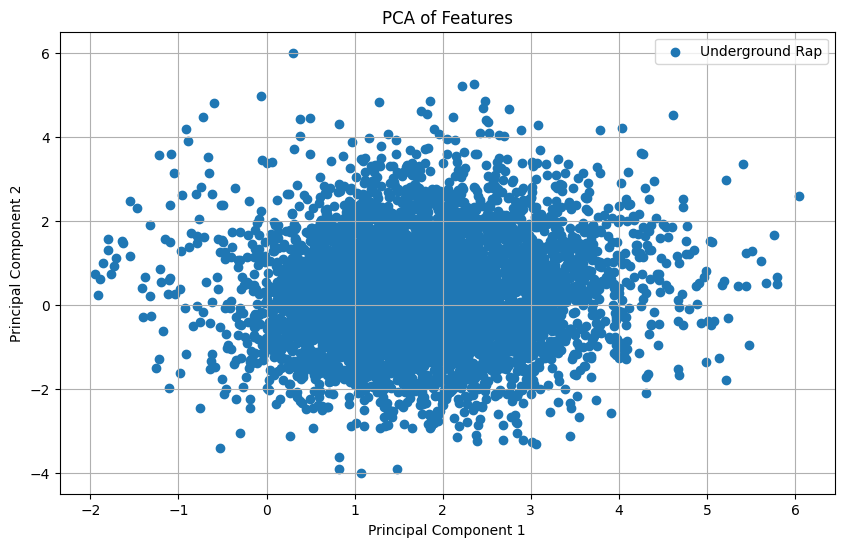

In [ ]:
plt.figure(figsize=(10, 6))

subset = pca_df[pca_df['genre'] == "Underground Rap"]
plt.scatter(subset['Principal Component 1'], subset['Principal Component 2'], label="Underground Rap")

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Features')
plt.legend()
plt.grid(True)
plt.show()

PCA plot of all the classes

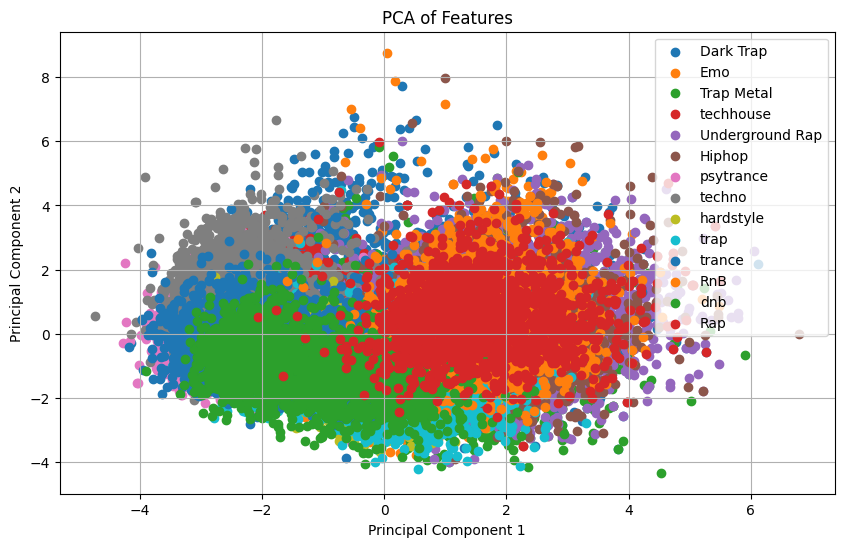

In [ ]:
plt.figure(figsize=(10, 6))
for genre in pca_df['genre'].unique():
# for genre in ["Underground Rap"]:
    subset = pca_df[pca_df['genre'] == genre]
    plt.scatter(subset['Principal Component 1'], subset['Principal Component 2'], label=genre)

# plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Features')
plt.legend()
plt.grid(True)
plt.show()

Multiple plots

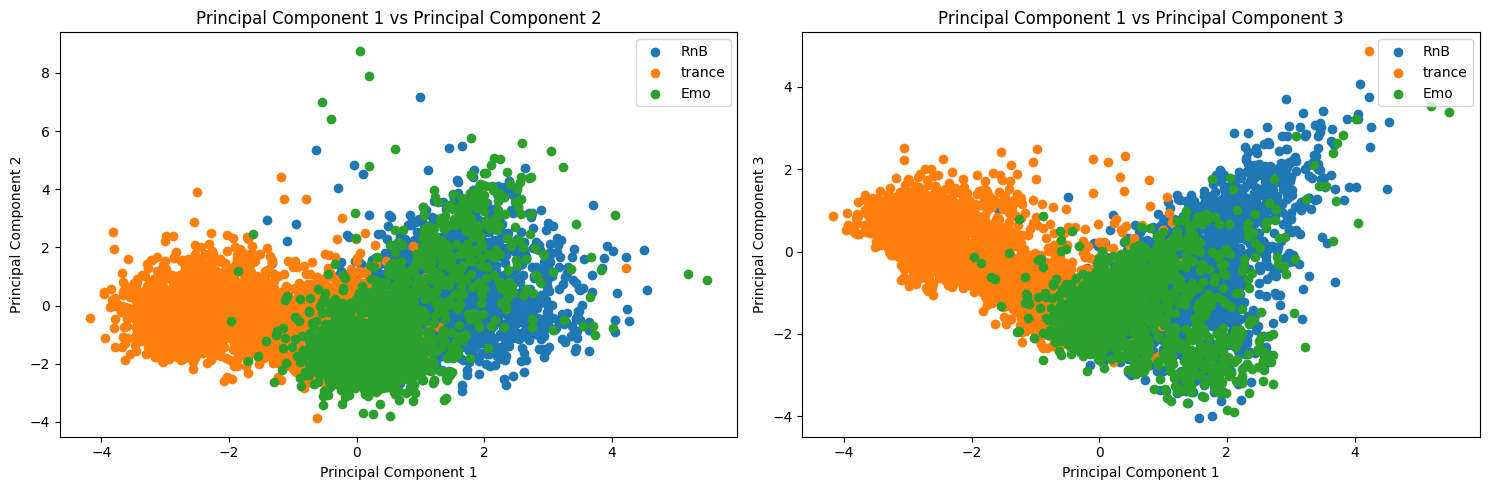

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

combinations = [
    ('Principal Component 1', 'Principal Component 2'),
    ('Principal Component 1', 'Principal Component 3'),
    # ('Principal Component 2', 'Principal Component 3'),
    # ('Principal Component 2', 'Principal Component 4'),
    # ('Principal Component 3', 'Principal Component 4'),
    # ('Principal Component 3', 'Principal Component 5')
]

genre_subset = ['Dark Trap', 'Emo', 'Trap Metal', 'techhouse', 'Underground Rap',
       'Hiphop', 'psytrance', 'techno', 'hardstyle', 'trap', 'trance',
       'RnB', 'dnb', 'Rap']
genre_subset = ['Emo', 'trance', 'RnB'] # very different genres, slight confusion, somewhat separated in the PCA plots
# genre_subset = ["Dark Trap","Underground Rap"] # a lot of confusion
# genre_subset = ["Trap Metal","Hiphop"] # not a lot of confusion, still very overlapping in the PCA plots
# genre_subset = ["Rap", "dnb"] # 0 confusion, slight overlapping
genre_subset.reverse()

for ax, (x, y) in zip(axes.flatten(), combinations):
    for genre in genre_subset:
        subset = pca_df[pca_df['genre'] == genre]
        ax.scatter(subset[x], subset[y], label=genre)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_title(f'{x} vs {y}')
    ax.legend()

plt.tight_layout()
plt.show()

## K-means

In [ ]:

kmeans = KMeans(n_clusters=4)  # Specify the number of clusters
kmeans.fit(principal_components)
labels = kmeans.labels_

# Add cluster labels to the DataFrame
pca_df['Cluster'] = labels

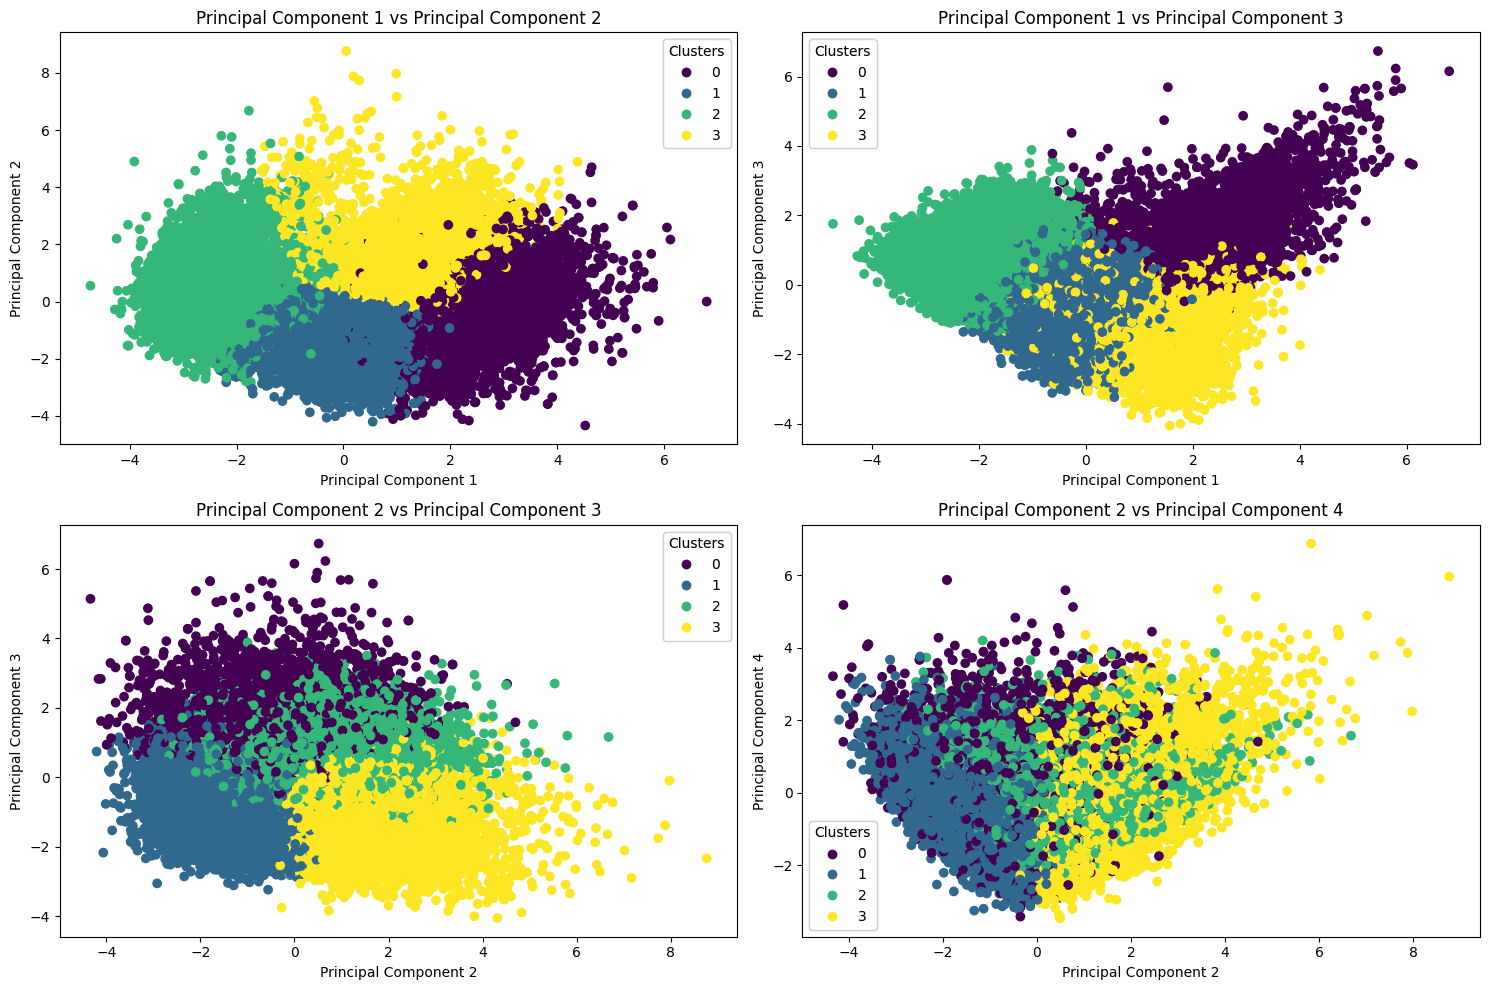

In [ ]:
combinations = [
    ('Principal Component 1', 'Principal Component 2'),
    ('Principal Component 1', 'Principal Component 3'),
    ('Principal Component 2', 'Principal Component 3'),
    ('Principal Component 2', 'Principal Component 4'),
    # ('Principal Component 3', 'Principal Component 4'),
    # ('Principal Component 3', 'Principal Component 5')
]

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for ax, (x, y) in zip(axes.flatten(), combinations):
    scatter = ax.scatter(pca_df[x], pca_df[y], c=pca_df['Cluster'], cmap='viridis')
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_title(f'{x} vs {y}')
    legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
    ax.add_artist(legend1)

plt.tight_layout()
plt.show()